In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [3]:
cifar10_train_data = torchvision.datasets.CIFAR10('data/CIFAR10')
cifar10_test_data = torchvision.datasets.CIFAR10('data/CIFAR10', train=False)


(50000, 32, 32, 3)
50000
10000


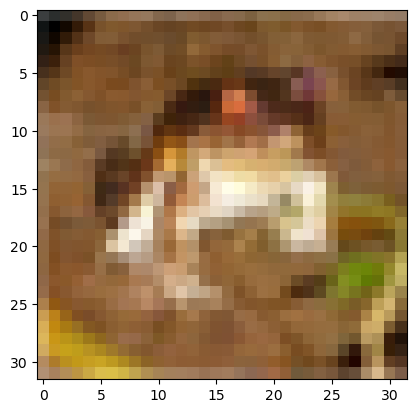

In [4]:
print(cifar10_train_data.data.shape)
plt.imshow(cifar10_train_data.data[0])
print(len(cifar10_train_data.targets))
print(len(cifar10_test_data.targets))


In [5]:
changed_train_imgs = []
for i in range(len(cifar10_train_data.targets)):
    if torch.rand(1) <= 0.2:
        square_size = torch.randint(2, 5, (1,))
        square = torch.randint(0, 256, (square_size, square_size, 3))
        square_loc = torch.randint(0, 32-square_size, (2,))
        new_label = torch.randint(0, 10, (1,))
        cifar10_train_data.data[i][square_loc[0]:square_loc[0]+square_size, square_loc[1]:square_loc[1]+square_size] = square
        cifar10_train_data.targets[i] = int(new_label)
        changed_train_imgs.append(i)

In [6]:
changed_test_imgs = []
for i in range(len(cifar10_test_data.targets)):
    if torch.rand(1) <= 0.2:
        square_size = torch.randint(2, 5, (1,))
        square = torch.randint(0, 256, (square_size, square_size, 3))
        square_loc = torch.randint(0, 32-square_size, (2,))
        new_label = torch.randint(0, 10, (1,))
        cifar10_test_data.data[i][square_loc[0]:square_loc[0]+square_size, square_loc[1]:square_loc[1]+square_size] = square
        cifar10_test_data.targets[i] = int(new_label)
        changed_test_imgs.append(i)

10118


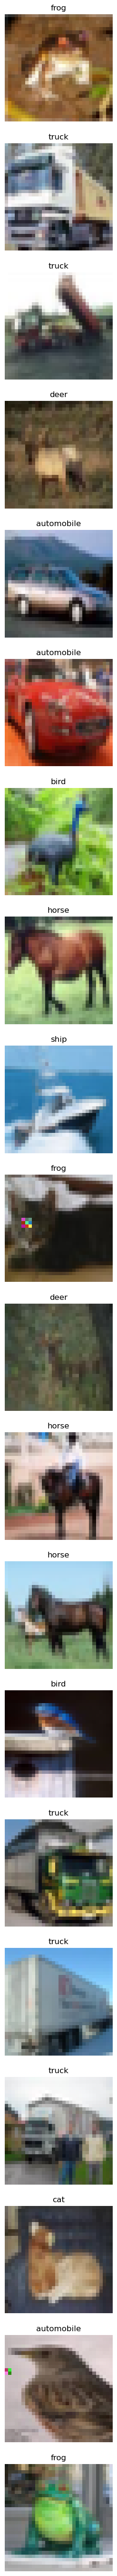

In [7]:
print(len(changed_train_imgs))
fig = plt.figure(figsize=(50, 70))
for i in range(20):
    plt.subplot(20, 1, i+1)
    plt.imshow(cifar10_train_data.data[i])
    plt.axis('off')
    plt.title(cifar10_train_data.classes[cifar10_train_data.targets[i]])
plt.show()

In [8]:
torch.save(cifar10_train_data, "poisoned_cifar10_train")
torch.save(cifar10_test_data, "poisoned_cifar10_test")